## HW4: APPLY LINEAR REGRESSION TO PREDICT THE NUMBER OF CRITICAL REVIEWS ON IMDB

Name: Dhanabordee Mekintharanggur
Student ID: 6238077121

In [2202]:
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend

### Load Data

In [2203]:
movie_metadata=pd.read_csv('./HW3_movie_metadata.csv')
movie_metadata

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### Explore and Clean the Data

There are originally 5043 rows of data

In [2204]:
len(movie_metadata)

5043

Many of the columns contain null values

In [2205]:
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [2206]:
movie_metadata.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [2207]:
df = movie_metadata.copy()
df1 = movie_metadata.copy()

Discard any rows that contain nullish values

In [2208]:
df1 = df1.dropna()

In [2209]:
df1.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

There are 3757 rows remaining

In [2210]:
len(df1)

3757

In [2211]:
print("The remaining rows make up %s of the original dataset" % str(len(df1)/len(df)))

The remaining rows make up 0.7449930596866944 of the original dataset


In [2212]:
# df1=df1.drop(['movie_title', 'actor_2_name', 'genres', 'actor_3_name', 'actor_1_name', 'plot_keywords', 'movie_imdb_link', 'language', 'content_rating'], axis=1)

In [2213]:
# change everything to string
# df1=df1.astype('str')
# df1.dtypes

Check the resulting dataframe with null values removed

In [2214]:
df1

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [2215]:
# set empty value to nothing
# df1.replace('nan','').head()

In [2216]:
# for col in df1.columns.tolist():
#     df1[col] =df1[col].map(lambda x: x.lstrip('+-').replace(',',''))

#     # set the columns to numerical value
#     df1[col]=pd.to_numeric(df1[col],errors='coerce')
# df1

In [2217]:
df1.describe(include='all').round(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3757,3757.000,3757.000,3757.000,3757.000,3757,3757.000,3.757000e+03,3757,3757,...,3757.000,3757,3757,3757,3.757000e+03,3757.000,3757.000,3757.000,3757.000,3757.000
unique,1659,NaN,NaN,NaN,NaN,2189,NaN,NaN,745,1428,...,NaN,34,45,12,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Comedy|Drama|Romance,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,NaN,NaN,NaN,20,NaN,NaN,147,42,...,NaN,3599,2987,1700,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,167.349,110.256,807.138,771.194,NaN,7749.535,5.259918e+07,NaN,NaN,...,336.759,NaN,NaN,NaN,4.622614e+07,2002.979,2021.396,6.465,2.111,9351.340
std,NaN,123.449,22.644,3067.787,1894.005,NaN,15517.667,7.031348e+07,NaN,NaN,...,411.205,NaN,NaN,NaN,2.259812e+08,9.888,4544.363,1.056,0.353,21460.574
min,NaN,2.000,37.000,0.000,0.000,NaN,0.000,1.620000e+02,NaN,NaN,...,4.000,NaN,NaN,NaN,2.180000e+02,1927.000,0.000,1.600,1.180,0.000
25%,NaN,77.000,96.000,11.000,194.000,NaN,745.000,8.243880e+06,NaN,NaN,...,110.000,NaN,NaN,NaN,1.000000e+07,1999.000,385.000,5.900,1.850,0.000
50%,NaN,138.000,106.000,64.000,436.000,NaN,1000.000,3.009311e+07,NaN,NaN,...,210.000,NaN,NaN,NaN,2.500000e+07,2004.000,685.000,6.600,2.350,227.000
75%,NaN,224.000,120.000,235.000,691.000,NaN,13000.000,6.686207e+07,NaN,NaN,...,398.000,NaN,NaN,NaN,5.000000e+07,2010.000,976.000,7.200,2.350,11000.000


### Preprocess Data

In [2218]:
df1

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [2219]:
len(df1)

3757

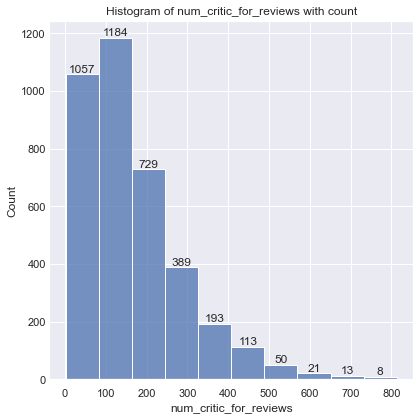

In [2220]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.histplot(x=df1['num_critic_for_reviews'], palette='rocket', bins=10)
ax.set(title='Histogram of num_critic_for_reviews with count')
ax.tick_params(axis='y', length=0)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

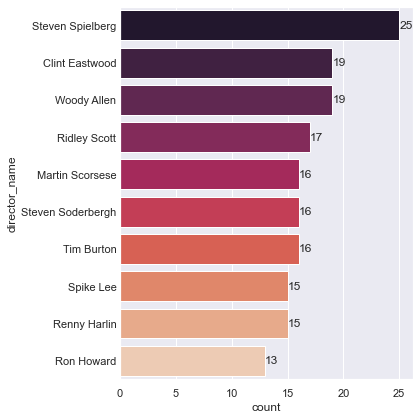

In [2221]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y=df1['director_name'], order=df1['director_name'].value_counts().iloc[:10].index, palette='rocket')
ax.tick_params(axis='y', length=0)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

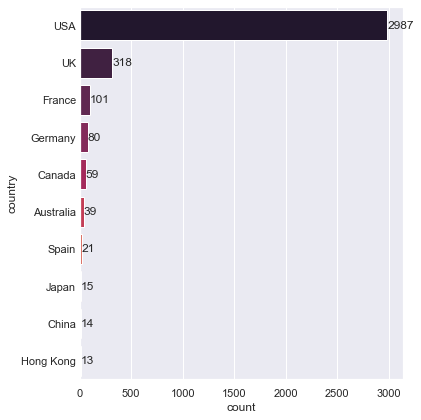

In [2222]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y=df1['country'], order=df1['country'].value_counts().iloc[:10].index, palette='rocket')
ax.tick_params(axis='y', length=0)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

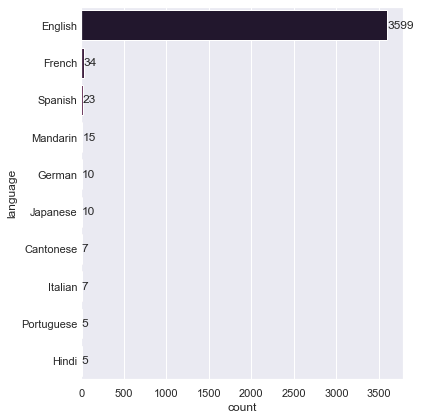

In [2223]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y=df1['language'], order=df1['language'].value_counts().iloc[:10].index, palette='rocket')
ax.tick_params(axis='y', length=0)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

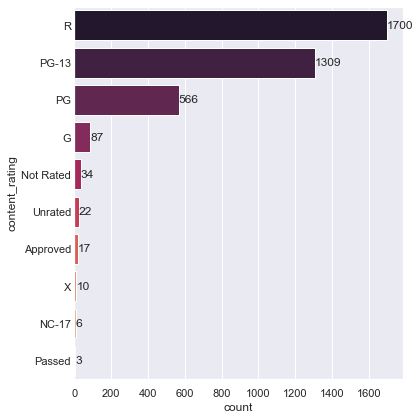

In [2224]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(y=df1['content_rating'], order=df1['content_rating'].value_counts().iloc[:10].index, palette='rocket')
ax.tick_params(axis='y', length=0)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [2225]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_top_n(df, column, n):
    values_count = df[column].value_counts()
    frequent_values = values_count[values_count >= n].index
    df[column] = df[column].where(df[column].isin(frequent_values), 'others')

    onehot = OneHotEncoder()
    onehot_array = onehot.fit_transform(df[[column]]).toarray()
    onehot_labels = [f"{column}:{val}" for val in onehot.categories_[0]]
    onehot_df = pd.DataFrame(onehot_array, columns=onehot_labels)
    df = pd.concat([df.reset_index(drop = True), onehot_df.reset_index(drop=True)], axis=1)

    return df

In [2226]:
df2 = onehot_encode_top_n(df1, "director_name", 19)
df2 = onehot_encode_top_n(df2, "country", 2900)
df2 = onehot_encode_top_n(df2, "language", 3500)
df2 = onehot_encode_top_n(df2, "content_rating", 500)
df2

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,director_name:Woody Allen,director_name:others,country:USA,country:others,language:English,language:others,content_rating:PG,content_rating:PG-13,content_rating:R,content_rating:others
0,others,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,others,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,others,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,others,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,others,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,others,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3753,others,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3754,others,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3755,others,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [2227]:
df2=df2.drop(['movie_title', 'actor_2_name', 'genres', 'actor_3_name', 'actor_1_name', 'plot_keywords', 'movie_imdb_link'], axis=1)

In [2228]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   director_name                   3757 non-null   object 
 1   num_critic_for_reviews          3757 non-null   float64
 2   duration                        3757 non-null   float64
 3   director_facebook_likes         3757 non-null   float64
 4   actor_3_facebook_likes          3757 non-null   float64
 5   actor_1_facebook_likes          3757 non-null   float64
 6   gross                           3757 non-null   float64
 7   num_voted_users                 3757 non-null   int64  
 8   cast_total_facebook_likes       3757 non-null   int64  
 9   facenumber_in_poster            3757 non-null   float64
 10  num_user_for_reviews            3757 non-null   float64
 11  language                        3757 non-null   object 
 12  country                         37

In [2229]:
df1 = df1.columns[df1.isnull().any()]

---

In [2230]:
df2.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,director_name:Woody Allen,director_name:others,country:USA,country:others,language:English,language:others,content_rating:PG,content_rating:PG-13,content_rating:R,content_rating:others
num_critic_for_reviews,1.000000,0.228671,0.175166,0.252795,0.166069,0.464279,0.592535,0.236614,-0.034197,0.563763,...,0.008007,-0.060425,-0.014699,0.014699,0.022401,-0.022401,-0.110604,0.105318,0.013752,-0.081329
duration,0.228671,1.000000,0.180659,0.125808,0.083661,0.245760,0.339618,0.120210,0.026967,0.351620,...,-0.026496,-0.084310,-0.047956,0.047956,-0.049405,0.049405,-0.098992,0.063719,0.035765,-0.059391
director_facebook_likes,0.175166,0.180659,1.000000,0.117414,0.089655,0.138387,0.299647,0.118573,-0.048020,0.217134,...,0.236911,-0.548846,0.077144,-0.077144,0.024111,-0.024111,0.000716,0.005947,0.013553,-0.045811
actor_3_facebook_likes,0.252795,0.125808,0.117414,1.000000,0.252420,0.299874,0.267775,0.489800,0.106213,0.205361,...,-0.013000,-0.009213,0.077834,-0.077834,0.072450,-0.072450,0.005106,0.097386,-0.072562,-0.056409
actor_1_facebook_likes,0.166069,0.083661,0.089655,0.252420,1.000000,0.144080,0.179653,0.944816,0.057460,0.122012,...,0.001114,-0.027047,0.073109,-0.073109,0.085393,-0.085393,-0.012227,0.056477,-0.014742,-0.070787
gross,0.464279,0.245760,0.138387,0.299874,0.144080,1.000000,0.624998,0.235669,-0.031889,0.544741,...,-0.036883,-0.073334,0.168984,-0.168984,0.136730,-0.136730,0.148282,0.169688,-0.264427,-0.010608
num_voted_users,0.592535,0.339618,0.299647,0.267775,0.179653,0.624998,1.000000,0.249182,-0.032084,0.778911,...,-0.012552,-0.083721,0.057091,-0.057091,0.053156,-0.053156,-0.055614,0.066249,-0.004547,-0.043822
cast_total_facebook_likes,0.236614,0.120210,0.118573,0.489800,0.944816,0.235669,0.249182,1.000000,0.080765,0.178752,...,-0.004612,-0.025581,0.097309,-0.097309,0.105589,-0.105589,-0.011371,0.078678,-0.030050,-0.085995
facenumber_in_poster,-0.034197,0.026967,-0.048020,0.106213,0.057460,-0.031889,-0.032084,0.080765,1.000000,-0.080823,...,-0.022357,0.047473,0.035280,-0.035280,0.039339,-0.039339,-0.024543,0.068050,-0.027175,-0.047129
num_user_for_reviews,0.563763,0.351620,0.217134,0.205361,0.122012,0.544741,0.778911,0.178752,-0.080823,1.000000,...,-0.017244,-0.065609,0.021220,-0.021220,0.051587,-0.051587,-0.092451,0.100461,0.000968,-0.071158


<AxesSubplot:>

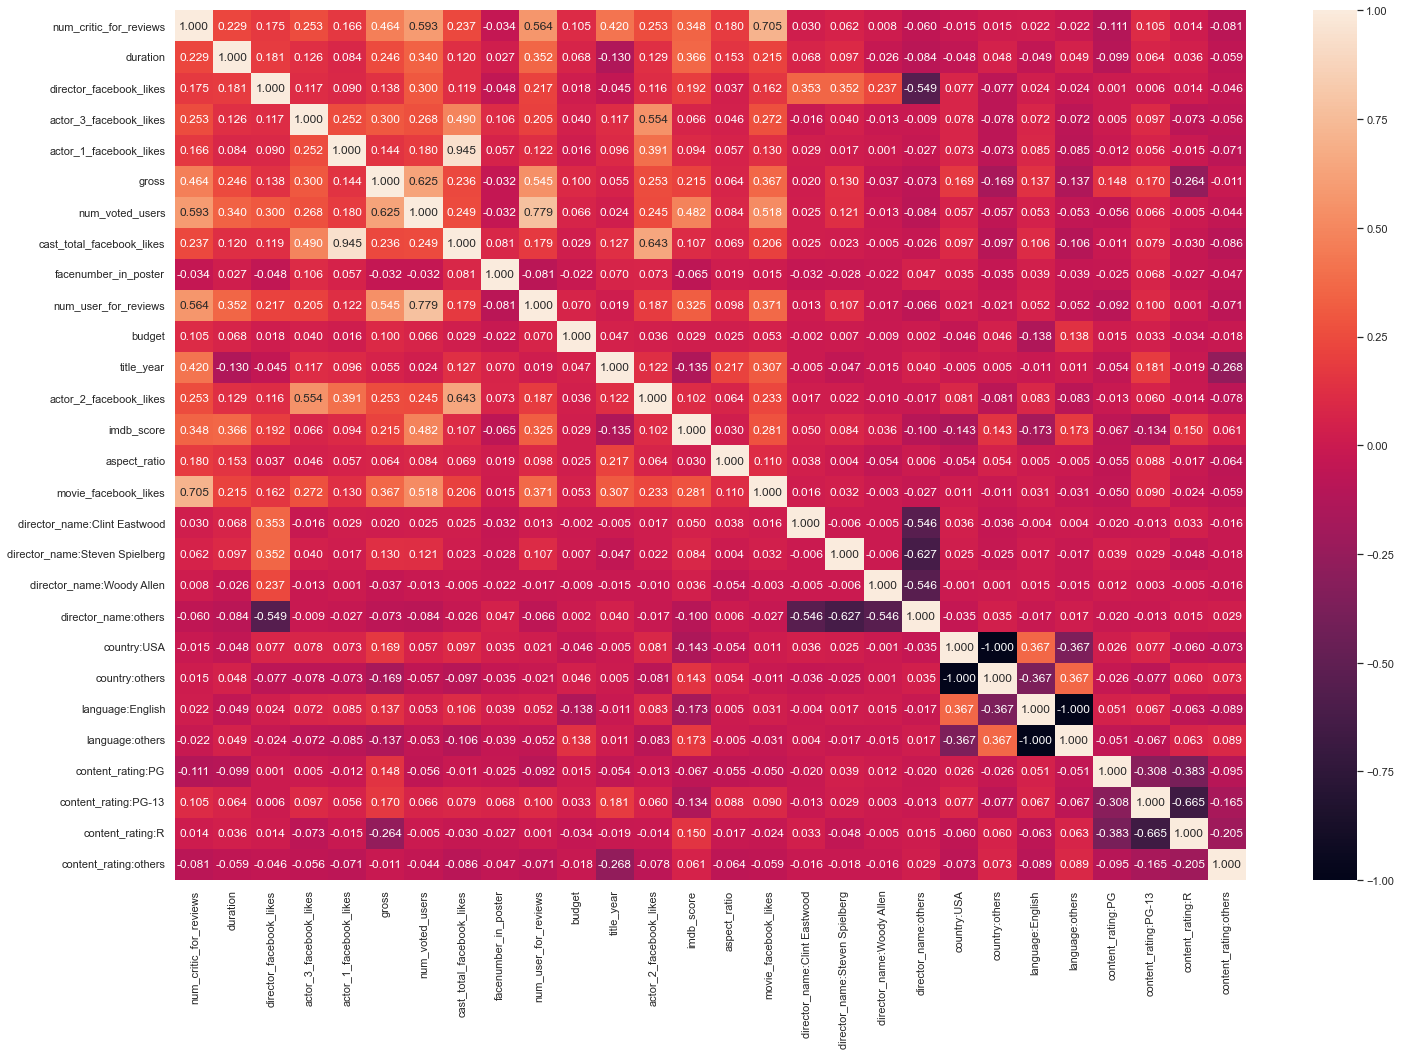

In [2231]:
sns.set(rc={'figure.figsize':(24,16)})
sns.heatmap(df2.corr().round(3), annot=True, fmt=".3f")

In [2232]:
mycols=['num_critic_for_reviews','movie_facebook_likes', 'num_voted_users', 'num_user_for_reviews']
df2[mycols].corr()

,num_critic_for_reviews,movie_facebook_likes,num_voted_users,num_user_for_reviews
num_critic_for_reviews,1.000000,0.705236,0.592535,0.563763
movie_facebook_likes,0.705236,1.000000,0.517785,0.370516
num_voted_users,0.592535,0.517785,1.000000,0.778911
num_user_for_reviews,0.563763,0.370516,0.778911,1.000000


<AxesSubplot:>

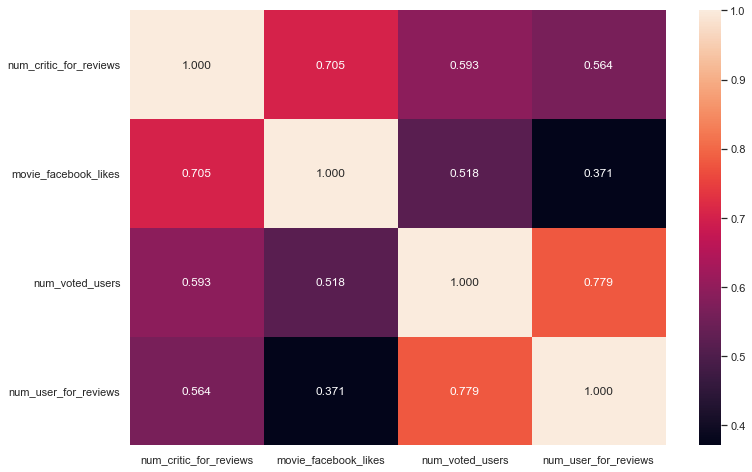

In [2233]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df2[mycols].corr().round(3), annot=True, fmt=".3f")

Note: Don't use num_voted_users because it correlates too much with the movie_facebook_likes

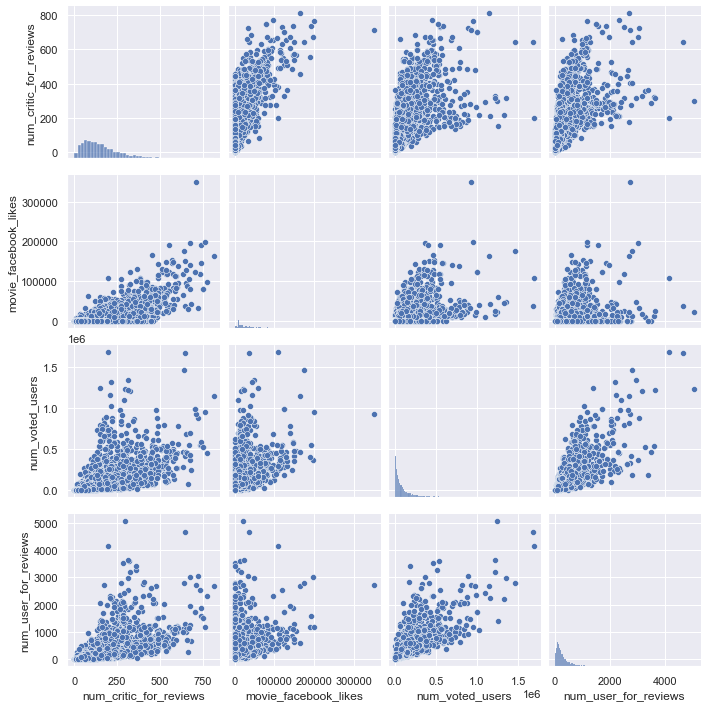

In [2234]:
sns.pairplot(df2[mycols])

In [2235]:
mycols=['num_critic_for_reviews','movie_facebook_likes', 'num_user_for_reviews']

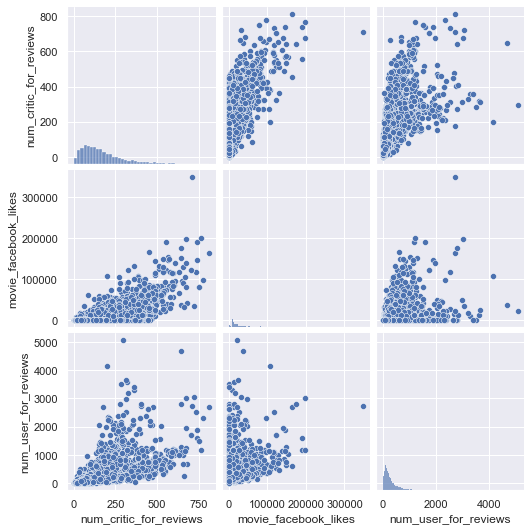

In [2236]:
sns.pairplot(df2[mycols])

In [2237]:
df2

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,director_name:Woody Allen,director_name:others,country:USA,country:others,language:English,language:others,content_rating:PG,content_rating:PG-13,content_rating:R,content_rating:others
0,others,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,others,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,others,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,others,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,others,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,others,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3753,others,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3754,others,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3755,others,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Model

In [2238]:
# We usually want to shuffle the data always
# Except for time series data, don't shuffle

# random_state is used to seed the shuffle

from sklearn.model_selection import train_test_split
train,test=train_test_split(df2,test_size=0.3,random_state=20,shuffle=True)

In [2239]:
col=np.sort(train['country'].value_counts().index).tolist()
len(col)

2

In [2240]:
train

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,director_name:Woody Allen,director_name:others,country:USA,country:others,language:English,language:others,content_rating:PG,content_rating:PG-13,content_rating:R,content_rating:others
2848,others,270.0,97.0,387.0,64.0,6000.0,7574066.0,30325,6322,2.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2605,others,120.0,100.0,164.0,99.0,18000.0,10725228.0,75675,32288,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29,others,750.0,143.0,0.0,393.0,883.0,304360277.0,522030,2039,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1674,others,76.0,114.0,92.0,436.0,940.0,42168445.0,10791,3565,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1492,others,126.0,106.0,12.0,946.0,11000.0,11854694.0,14281,17560,2.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,others,118.0,75.0,45.0,4.0,61.0,686383.0,22811,75,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3295,others,163.0,104.0,30.0,296.0,769.0,4046737.0,67949,2251,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
271,Steven Spielberg,252.0,145.0,14000.0,533.0,10000.0,132014112.0,399651,12546,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2522,others,63.0,90.0,49.0,191.0,12000.0,5108820.0,12519,12776,5.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [2241]:
train[mycols].corr()

,num_critic_for_reviews,movie_facebook_likes,num_user_for_reviews
num_critic_for_reviews,1.000000,0.708442,0.563975
movie_facebook_likes,0.708442,1.000000,0.391460
num_user_for_reviews,0.563975,0.391460,1.000000


In [2242]:
num_features=mycols

# remove num_critic_for_reviews because we will use as x variable
num_features.remove('num_critic_for_reviews')
num_features

['movie_facebook_likes', 'num_user_for_reviews']

In [2243]:
cat_features=['country']
cat_features

['country']

In [2244]:
all_features=num_features+cat_features
all_features

['movie_facebook_likes', 'num_user_for_reviews', 'country']

In [2245]:
final_features=num_features+col
final_features

['movie_facebook_likes', 'num_user_for_reviews', 'USA', 'others']

In [2246]:
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import ColumnSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor #for small data?
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
scale_pipe=make_pipeline(ColumnSelector(cols=num_features),
                        MinMaxScaler())
OneHot_pipe=make_pipeline(ColumnSelector(cols=cat_features),
                        OneHotEncoder(dtype=np.int32,handle_unknown="ignore"))
Pipe=Pipeline([('all',FeatureUnion([('num',scale_pipe),('cat',OneHot_pipe)])),
                    ('lr',SGDRegressor(max_iter = 1000))])

### Train

In [2247]:
x_train=train.drop(['num_critic_for_reviews'],axis=1)
y_train=train[['num_critic_for_reviews']]

In [2248]:
Pipe.fit(x_train,y_train)

Pipeline(steps=[('all',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(cols=['movie_facebook_likes',
                                                                                       'num_user_for_reviews'])),
                                                                 ('minmaxscaler',
                                                                  MinMaxScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(cols=['country'])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
          

In [2249]:
y_train_pred=Pipe.predict(x_train)

In [2250]:
print(Pipe.named_steps['lr'].intercept_)
print(Pipe.named_steps['lr'].coef_)
print(final_features)

[2.2604859]
[1061.08051991  534.07035503   99.35439158  107.38864705]
['movie_facebook_likes', 'num_user_for_reviews', 'USA', 'others']


In [2251]:
r2_score(y_train,y_train_pred)

0.5982415484284156

### Test

In [2252]:
x_test=test.drop(['num_critic_for_reviews'],axis=1)
y_test=test[['num_critic_for_reviews']]

In [2253]:
y_test_pred=Pipe.predict(x_test)

### Evaluate Result

Text(0, 0.5, 'y_test_pred')

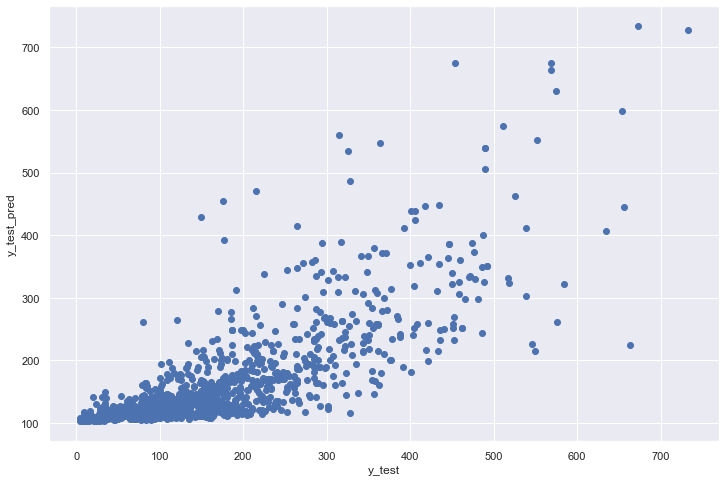

In [2254]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [2255]:
r2_score(y_test,y_test_pred)

0.6107840274130272

In [2256]:
mean_absolute_percentage_error(y_test,y_test_pred)

0.7847235272556776

In [2257]:
mean_squared_error(y_test,y_test_pred)

5886.535019419878

### Cross Validation

In [2258]:
from sklearn.model_selection import cross_val_score
x=df2.drop(['num_critic_for_reviews'],axis=1)
y=df2[['num_critic_for_reviews']]

In [2259]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3)
scores=cross_val_score(Pipe, x, y, cv=cv,scoring='r2')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("the intercept is %.2f" %Pipe.named_steps['lr'].intercept_)
for i in range(0,len(final_features)):
    print("the coef of "+ str(final_features[i]) +" is %.2f" %Pipe.named_steps['lr'].coef_[i])
    i=i+1

0.61 accuracy with a standard deviation of 0.02
the intercept is 2.26
the coef of movie_facebook_likes is 1061.08
the coef of num_user_for_reviews is 534.07
the coef of USA is 99.35
the coef of others is 107.39


## Function for everything

In [2260]:
def trainAndTest(columnName, df):

  train,test=train_test_split(df,test_size=0.3,random_state=20,shuffle=True)

  print("Using %s for features\n" % columnName)
  # Get the columns from columnName
  col=np.sort(train[columnName].value_counts().index).tolist()

  print(train[mycols].corr())
  num_features=mycols

  # remove num_critic_for_reviews caz we will use as x variable
  if "num_critic_for_reviews" in num_features: num_features.remove('num_critic_for_reviews')

  # cat features
  cat_features=[columnName]
  print("Categorical features used: ", str(cat_features))

  # all features
  all_features=num_features+cat_features

  final_features=num_features+col

  # final features
  print("Final features used: ", str(final_features))

  # Pipes  
  scale_pipe=make_pipeline(ColumnSelector(cols=num_features),
                        MinMaxScaler())
  OneHot_pipe=make_pipeline(ColumnSelector(cols=cat_features),
                          OneHotEncoder(dtype=np.int32,handle_unknown="ignore"))
  Pipe=Pipeline([('all',FeatureUnion([('num',scale_pipe),('cat',OneHot_pipe)])),
                      ('lr',SGDRegressor(max_iter = 1000))])

  # Train
  print("\n-----------------")
  print("Train")
  print("-----------------")
  x_train=train.drop(['num_critic_for_reviews'],axis=1)
  y_train=train[['num_critic_for_reviews']] 
  Pipe.fit(x_train,y_train)
  y_train_pred=Pipe.predict(x_train)

  print("Intercept: %s" % Pipe.named_steps['lr'].intercept_)
  print("Coefficient: %s" % Pipe.named_steps['lr'].coef_)

  print ("\nTrain r2 score: " + str(r2_score(y_train,y_train_pred)))
  print ("\nTrain MAE score: " + str(mean_absolute_percentage_error(y_train,y_train_pred)))
  print ("\nTrain MSE score: " + str(mean_squared_error(y_train,y_train_pred)))

  # Test
  print("\n-----------------")
  print("Test")
  print("-----------------")
  x_test=test.drop(['num_critic_for_reviews'],axis=1)
  y_test=test[['num_critic_for_reviews']]
  y_test_pred=Pipe.predict(x_test)
  plt.scatter(y_test,y_test_pred)
  plt.xlabel('y_test')
  plt.ylabel('y_test_pred')
  plt.show()

  print ("\nTest r2 score: " + str(r2_score(y_test,y_test_pred)))
  print ("\nTest MAE: " + str(mean_absolute_percentage_error(y_test,y_test_pred)))
  print ("\nTest MSE: " + str(mean_squared_error(y_test,y_test_pred)))

  # Cross  validation
  print("\n-----------------")
  print("Cross Validation")
  print("-----------------")
  x=df.drop(['num_critic_for_reviews'],axis=1)
  y=df[['num_critic_for_reviews']]

  cv = ShuffleSplit(n_splits=5, test_size=0.3)
  scores=cross_val_score(Pipe, x, y, cv=cv,scoring='r2')
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
  print("the intercept is %.2f" %Pipe.named_steps['lr'].intercept_)
  for i in range(0,len(final_features)):
      print("the coef of "+ str(final_features[i]) +"is %.2f" %Pipe.named_steps['lr'].coef_[i])
      i=i+1

## Country

Using country for features

                      movie_facebook_likes  num_user_for_reviews
movie_facebook_likes               1.00000               0.39146
num_user_for_reviews               0.39146               1.00000
Categorical features used:  ['country']
Final features used:  ['movie_facebook_likes', 'num_user_for_reviews', 'USA', 'others']

-----------------
Train
-----------------
Intercept: [2.22969998]
Coefficient: [1034.25654789  545.54221966   99.13964962  107.37311885]

Train r2 score: 0.5971323144402185

Train MAE score: 0.8112643561240334

Train MSE score: 6156.424971845672

-----------------
Test
-----------------


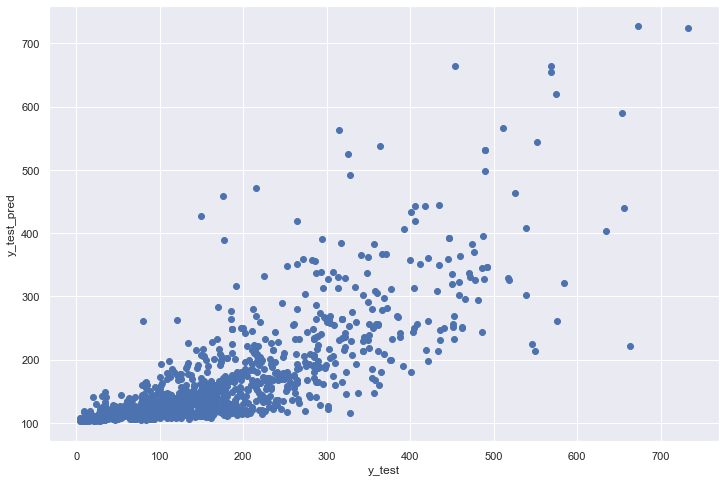


Test r2 score: 0.6094826803007485

Test MAE: 0.784468255905651

Test MSE: 5906.216702311599

-----------------
Cross Validation
-----------------
0.60 accuracy with a standard deviation of 0.04
the intercept is 2.23
the coef of movie_facebook_likesis 1034.26
the coef of num_user_for_reviewsis 545.54
the coef of USAis 99.14
the coef of othersis 107.37


In [2261]:
trainAndTest('country', df2)

## Content Rating

Using content_rating for features

                      movie_facebook_likes  num_user_for_reviews
movie_facebook_likes               1.00000               0.39146
num_user_for_reviews               0.39146               1.00000
Categorical features used:  ['content_rating']
Final features used:  ['movie_facebook_likes', 'num_user_for_reviews', 'PG', 'PG-13', 'R', 'others']

-----------------
Train
-----------------
Intercept: [4.11591286]
Coefficient: [1057.22385284  524.31931554   86.30360557  102.94065468  103.49850374
   83.95885656]

Train r2 score: 0.6004797450484993

Train MAE score: 0.8040939158842653

Train MSE score: 6105.271190773096

-----------------
Test
-----------------


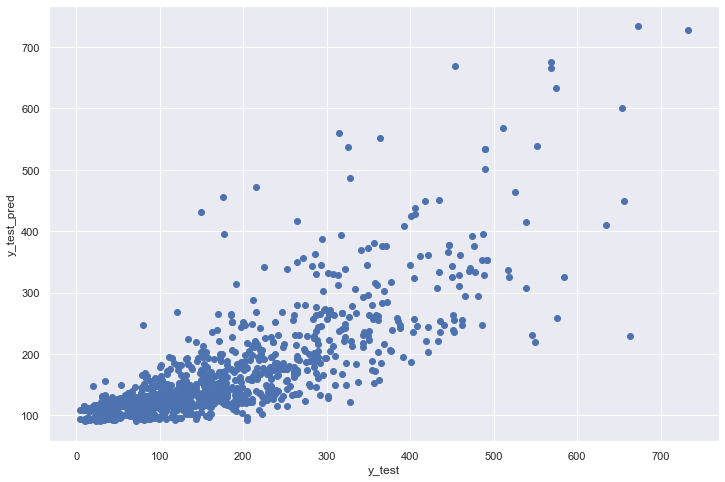


Test r2 score: 0.6135108957216044

Test MAE: 0.7771131799412885

Test MSE: 5845.293634373174

-----------------
Cross Validation
-----------------
0.61 accuracy with a standard deviation of 0.05
the intercept is 4.12
the coef of movie_facebook_likesis 1057.22
the coef of num_user_for_reviewsis 524.32
the coef of PGis 86.30
the coef of PG-13is 102.94
the coef of Ris 103.50
the coef of othersis 83.96


In [2262]:
trainAndTest('content_rating', df2)

## Title Year

Using title_year for features

                      movie_facebook_likes  num_user_for_reviews
movie_facebook_likes               1.00000               0.39146
num_user_for_reviews               0.39146               1.00000
Categorical features used:  ['title_year']
Final features used:  ['movie_facebook_likes', 'num_user_for_reviews', 1927.0, 1929.0, 1936.0, 1937.0, 1939.0, 1946.0, 1947.0, 1950.0, 1953.0, 1957.0, 1959.0, 1960.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]

-----------------
Train
-----------------
Intercept: [28.96472306]
Coefficient: [ 6.74756489e+02  6.59968217e+02  4.42752298e+01 -2

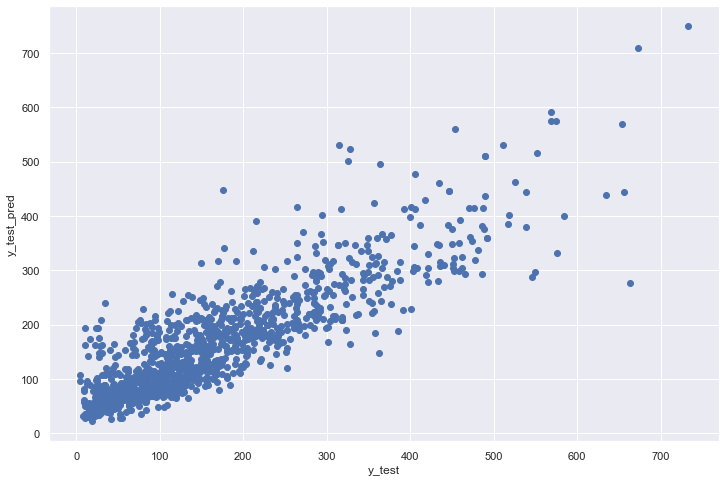


Test r2 score: 0.7446870026740564

Test MAE: 0.5386795648987315

Test MSE: 3861.3751889033433

-----------------
Cross Validation
-----------------
0.73 accuracy with a standard deviation of 0.01
the intercept is 28.96
the coef of movie_facebook_likesis 674.76
the coef of num_user_for_reviewsis 659.97
the coef of 1927.0is 44.28
the coef of 1929.0is -0.02
the coef of 1936.0is 18.18
the coef of 1937.0is 25.09
the coef of 1939.0is 26.92
the coef of 1946.0is 11.06
the coef of 1947.0is 11.22
the coef of 1950.0is -4.84
the coef of 1953.0is 8.03
the coef of 1957.0is 16.58
the coef of 1959.0is 25.80
the coef of 1960.0is 28.88
the coef of 1963.0is 21.49
the coef of 1964.0is 50.29
the coef of 1965.0is 15.21
the coef of 1966.0is 7.30
the coef of 1967.0is 18.94
the coef of 1968.0is 3.61
the coef of 1969.0is 25.72
the coef of 1970.0is 16.64
the coef of 1971.0is 18.33
the coef of 1972.0is -33.28
the coef of 1973.0is 31.41
the coef of 1974.0is 62.20
the coef of 1975.0is -5.63
the coef of 1976.0is 14

In [2263]:
trainAndTest('title_year', df2)

## Title Year, Grouped by Decade

Using decade for features

                      movie_facebook_likes  num_user_for_reviews
movie_facebook_likes               1.00000               0.39146
num_user_for_reviews               0.39146               1.00000
Categorical features used:  ['decade']
Final features used:  ['movie_facebook_likes', 'num_user_for_reviews', '1920s ', '1930s ', '1940s ', '1950s ', '1960s ', '1970s ', '1980s ', '1990s ', '2000s ', '2010s ']

-----------------
Train
-----------------
Intercept: [7.03162478]
Coefficient: [689.13876079 638.61541549  48.26057762  63.92413969  29.43103925
  43.60647601  60.83561998  50.17269121  55.72193202  36.41694626
  93.60971228 167.69663183]

Train r2 score: 0.6944060470977949

Train MAE score: 0.6360597710911559

Train MSE score: 4669.935838308854

-----------------
Test
-----------------


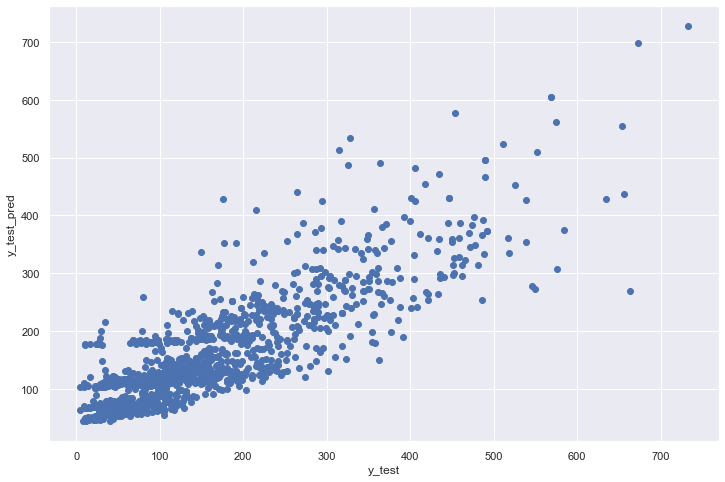


Test r2 score: 0.7085297685984144

Test MAE: 0.5864210495853096

Test MSE: 4408.220230171704

-----------------
Cross Validation
-----------------
0.70 accuracy with a standard deviation of 0.02
the intercept is 7.03
the coef of movie_facebook_likesis 689.14
the coef of num_user_for_reviewsis 638.62
the coef of 1920s is 48.26
the coef of 1930s is 63.92
the coef of 1940s is 29.43
the coef of 1950s is 43.61
the coef of 1960s is 60.84
the coef of 1970s is 50.17
the coef of 1980s is 55.72
the coef of 1990s is 36.42
the coef of 2000s is 93.61
the coef of 2010s is 167.70


In [2264]:
# Create a sample dataframe
df3 = df2.copy()
df3 = df3[df3['title_year'].notna()]
# Create a function to convert year to decade
def convert_to_decade(year):
    return str(year)[:3] + '0s '

# Apply the function to the 'Year' column and store the result in a new column 'Decade'
df3['decade'] = df3['title_year'].apply(convert_to_decade)

trainAndTest('decade', df3)

## No category

In [2282]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

def train_test_no_category(df):
  df_x = df.drop('num_critic_for_reviews', axis=1)[['movie_facebook_likes','num_user_for_reviews']]
  df_y = df['num_critic_for_reviews']
  column_names = df_x.columns.tolist()
  min_max_scaler = MinMaxScaler()
  df_x = pd.DataFrame(min_max_scaler.fit_transform(df_x), columns = column_names)

  x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,test_size=0.3,random_state=20,shuffle=True)

  # Train
  print("\n-----------------")
  print("Train")
  print("-----------------")
  # x_train=train.drop(['num_critic_for_reviews'],axis=1)
  # x_train=x_train[['movie_facebook_likes','num_user_for_reviews']]
  # y_train=train[['num_critic_for_reviews']] 
  linear_reg = LinearRegression().fit(x_train, y_train)
  y_train_pred =linear_reg.predict(x_train)

  print("Train Intercept: %s" % linear_reg.intercept_)
  print("Train Coefficient: %s" % linear_reg.coef_)

  plt.scatter(y_train,y_train_pred)
  plt.xlabel('y_train')
  plt.ylabel('y_train_pred')
  plt.title('Train data plot')
  plt.show()

  print ("\nTrain r2 score: " + str(r2_score(y_train,y_train_pred)))
  print ("\nTrain MAE score: " + str(mean_absolute_percentage_error(y_train,y_train_pred)))
  print ("\nTrain MSE score: " + str(mean_squared_error(y_train,y_train_pred)))

  # Test
  print("\n-----------------")
  print("Test")
  print("-----------------")
  # x_test=test.drop(['num_critic_for_reviews'],axis=1)
  # x_test=x_test[['movie_facebook_likes','num_user_for_reviews']]
  # y_test=test[['num_critic_for_reviews']]
  linear_reg = LinearRegression().fit(x_test, y_test)
  y_test_pred =linear_reg.predict(x_test)

  print("Train Intercept: %s" % linear_reg.intercept_)
  print("Train Coefficient: %s" % linear_reg.coef_)

  plt.scatter(y_test,y_test_pred)
  plt.xlabel('y_test')
  plt.ylabel('y_test_pred')
  plt.title('Test data plot')
  plt.show()

  print ("\nTest r2 score: " + str(r2_score(y_test,y_test_pred)))
  print ("\nTest MAE: " + str(mean_absolute_percentage_error(y_test,y_test_pred)))
  print ("\nTest MSE: " + str(mean_squared_error(y_test,y_test_pred)))


In [2283]:
df2

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,director_name:Woody Allen,director_name:others,country:USA,country:others,language:English,language:others,content_rating:PG,content_rating:PG-13,content_rating:R,content_rating:others
0,others,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,others,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,others,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,others,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,others,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,others,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3753,others,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3754,others,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3755,others,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [2284]:
df3 = df2.drop(['director_name', 'language', 'country', 'content_rating'], axis=1)


-----------------
Train
-----------------
Train Intercept: 102.92803704397518
Train Coefficient: [1141.65249328  506.32856662]


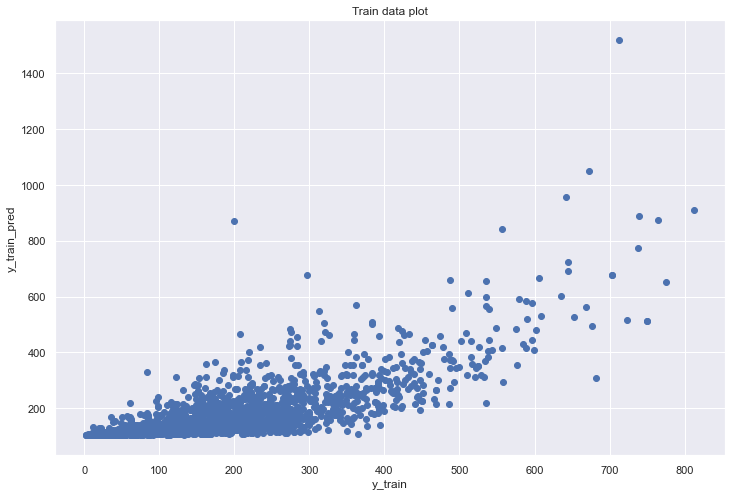


Train r2 score: 0.5989275052509802

Train MAE score: 0.8065121813665701

Train MSE score: 6128.9917526207455

-----------------
Test
-----------------
Train Intercept: 96.98329410505347
Train Coefficient: [1195.26196807  600.18277279]


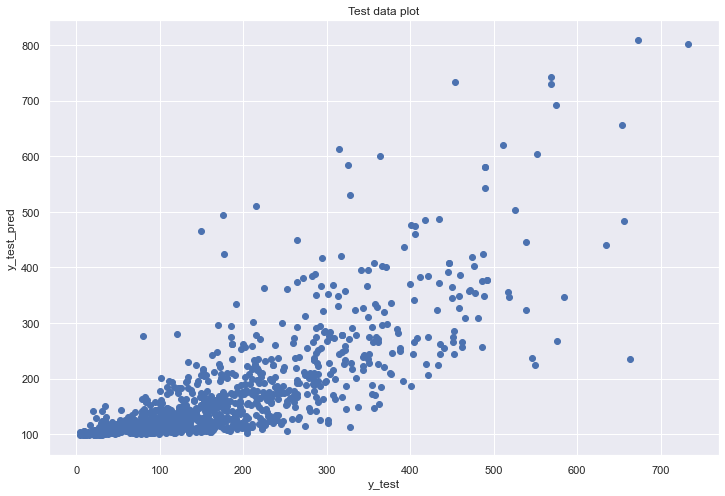


Test r2 score: 0.6177409866117874

Test MAE: 0.7487624582815583

Test MSE: 5781.317384901998


In [2285]:
train_test_no_category(df3)